In [1]:
import numpy as np

<p style="background-color:tomato;">Plotting a gaussian (Normal) distribution pdf</p>

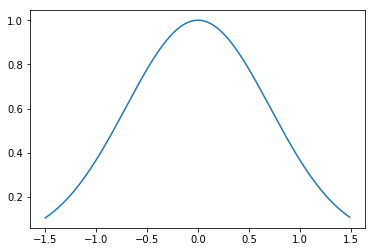

In [64]:
import matplotlib.pyplot as plt
# Create some test data
dx = 0.01
X  = np.arange(-1.5, 1.5, dx)
Y  = exp(-X**2)
plt.plot(X, Y)
show()

<p style="background-color:tomato;">Long Tale</p>
<p style="background-color:orange;">The probability of getting large values are much higher than getting small ones</p>
<p style="color:orange;">L3 cache determines how much data we can put once in a cache and is a significant factor in buying laptops.</p>

In [66]:
#traditional 
#We declare the order for apply the function
[i*i for i in range(0,10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

<p style="background-color:tomato;">Map reduce</p>

In [81]:
#We don't declare the order for applying the function
L = np.arange(0,11)
L2 = list(map(lambda x:x*x, L))
L2

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [83]:
#traditional way of summation
#compute everything from the beginning to the last
sum(L)
s = 0
for i in L:
    s+=i
print(s)

55


In [108]:
#Map reduce approach of summation
import functools
functools.reduce(lambda a,b : a+b,L)

55

<p style="background-color:tomato;">Map reduce</p>

In [93]:
summation = lambda x,y: x+y
summation(3,4)

7

<p style="color:tomato;">Map + reduce</p>

In [113]:
functools.reduce(lambda x,y:x+y, L2) #Is equal to
functools.reduce(lambda x,y:x+y, map(lambda i:i*i, L))

385

In [125]:
functools.reduce(lambda x,y:x+y**2,L)

385

In [2]:
%time
s = 0
L = np.arange(1,100000)
for i in L:
    s+= i

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.3 µs


In [6]:
%time
s = 0
import functools
L = np.arange(1,100000)
functools.reduce(lambda x,y:x+y, L)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


4999950000

In [3]:
def tradition(L):
    s = 0
    for i in L:
        s+= i
    return s
def mpr(L):
    return functools.reduce(lambda x,y:x+y, L)

In [ ]:
import functools
L = np.arange(0, 10**8)
traditional = []
mapreduce = []
for i in range(1000):
    traditional.append(tradition(L))
    mapreduce.append(mpr(L))

In [ ]:
print(np.mean(traditional))
print(np.mean(mapreduce))

In [14]:
L = np.arange(1,10)
list(map(lambda x:x**2, L))

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
from pyspark import SparkContext
sc = SparkContext()

In [38]:
#Initialize an RDD
RDD = sc.parallelize([0,1,2])
#sum the squares of the items
#RDD.map(lambda x:x*x, functools.reduce(lambda x,y:x+y, L))

<p style="background-color:tomato;">RDD to RDD</p>

In [42]:
RDD = sc.parallelize([0,1,2])
A = RDD.map(lambda x:x*x)
A.collect() #collects all the elements of the RDD into a master

[0, 1, 4]

In [52]:
n = 10000
B = sc.parallelize(range(n))
#get the first elements of an RDD
print("first element = ", B.first())
print("first 5 elements = ", B.take(5))
print("random 5 chosen elements = ")
m = 5.0
C = B.sample(False,m/n)
C.collect()

first element =  0
first 5 elements =  [0, 1, 2, 3, 4]
random 5 chosen elements = 


[1657, 5629, 6965, 8644, 9864, 9953]

<p style="background-color:tomato;">Map and sample on an RDD also return RDD</p>

In [56]:
A = sc.parallelize(range(4)) #RDD for 4 items
Lines = sc.parallelize(["Happy", "volition", "dojourn"]) #each element is a line or a string

<p style="background-color:tomato;">Creation: making RDDs from files, databases or data on driver node</p>
<p style="background-color:tomato;">Transformation: RDD to RDD</p>
<p style="background-color:tomato;">Action: RDD to data on driver node, files, databases, etc.</p>

In [60]:
A =sc.parallelize(range(4)).count()

In [62]:
#A.reduce(lambda x,y:x+y)

In [72]:
#database = sc.parallelize(
    #('55632',{'name':'yoav','city':'J'}),
    #('3342',{'name':'homer','town':'F'}))

In [71]:
#car_count = sc.parallelize(
#('h',3),
#('a',4))

<p style="background-color:tomato;">Spark context</p>
<p style="background-color:tomato;">Spark context is the deligate to Spark</p>

In [75]:
#start the sparkcontext
import findspark
findspark.init()

In [77]:
from pyspark import SparkContext

In [85]:
sc.stop()

In [86]:
sc = SparkContext(master="local[4]")

In [87]:
print(sc)

<SparkContext master=local[4] appName=pyspark-shell>


In [88]:
sc.stop()

In [89]:
import findspark
findspark.init()

In [94]:
from pyspark import SparkContext
sc = SparkContext(master="local[4]") #run spark locally using 4 workers(cores)
print(sc)

<SparkContext master=local[4] appName=pyspark-shell>


<p style="background-color:gold;">RDDs are the main novel data structure in Spark like a list whose elements are stored in several computers</p>

In [97]:
A = sc.parallelize(range(3))

In [99]:
#gerring visibility by use of command collect 
#collect is the inverse of parallelize, collecting the elements of the RDD

In [101]:
L = A.collect()
print(type(L))
print(L)

<class 'list'>
[0, 1, 2]


<p style="background-color:gold;">Map for applying a function to each element of RDD, then returns a new RDD</p>

In [105]:
A # is the RDD
A.collect() #ousts the RDD

[0, 1, 2]

In [106]:
A.map(lambda x:x*x).collect()

[0, 1, 4]

<p style="background-color:gold;">Reduce takes an RDD as input and returns a single value</p>

In [110]:
Rdd = sc.parallelize(range(1,100,5))

In [111]:
Rdd.collect()

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]

In [115]:
Rdd.map(lambda x:x*3-x).collect()

[2,
 12,
 22,
 32,
 42,
 52,
 62,
 72,
 82,
 92,
 102,
 112,
 122,
 132,
 142,
 152,
 162,
 172,
 182,
 192]

In [2]:
#Finding the word with the lowest lenght
from pyspark import SparkContext
sc = SparkContext(master="local[4]")

In [4]:
words = ["this", "is", "the", "best", "mac","ever"]
wordRDD = sc.parallelize(words)

In [15]:
wordRDD.reduce(lambda w,v:w if len(w)<len(v) else v)

'is'

In [14]:
minimum = len(words[0])
for i in range(len(words)):
    if len(words[i]) < minimum:
        minimum = len(words[i])
        word = words[i]
print(minimum, word)

2 is
